In [3]:
!pip install wordcloud

     ---------------------------------------- 0.0/138.5 kB ? eta -:--:--
     -------------------------------------- 138.5/138.5 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 299.9/299.9 kB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   --- ------------------------------------ 0.6/7.2 MB 17.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.2/7.2 MB 27.7 MB/s eta 0:00:01
   -------------------------- ------------- 4.7/7.2 MB 33.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.1/7.2 MB 32.6 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 33.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------- ----- 2.2/2.5 MB 46.6 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 40.1 MB/s eta 0:00:00
   ----------------

In [3]:
import sys
print(sys.executable)

C:\Users\aadit\anaconda\python.exe


In [7]:
!{sys.executable} -m pip install wordcloud

In [1]:
!where python

C:\Users\aadit\anaconda\envs\new_tnf\python.exe
C:\Users\aadit\anaconda\python.exe
C:\Users\aadit\AppData\Local\Microsoft\WindowsApps\python.exe


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv(r"C:\Users\aadit\Downloads\Shein.csv")
print(data.head())

                               reviewId  \
0  9f73e569-bb36-4c35-a5c2-5412a3e32cc6   
1  731ca074-021f-40fa-a66e-bf7d55702450   
2  feab6570-16c8-4157-933c-1af2a55193ce   
3  32155d73-a4b5-4038-9ed5-9018c40acfb7   
4  25316898-663a-4a52-ba0d-38b32335c499   

                                             content  score  thumbsUpCount  \
0  I have bought all my clothes from shein for th...      5            323   
1  PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...      1            215   
2  Great app for shopping, but I love shein it's ...      2            160   
3  Update: one item out of 5 in order recently re...      3             20   
4  Nice app to buy hair accessories, summer dress...      4           7630   

              at                                       replyContent  \
0  1723348459000                                                NaN   
1  1723359459000  Hi! Hope you have a nice shopping experience h...   
2  1722911026000  Hi! Hope you have a nice shopping experie

In [5]:
print(data.isnull().sum())

reviewId             0
content              0
score                0
thumbsUpCount        0
at                   0
replyContent     29290
repliedAt        29290
appName              0
dtype: int64


In [7]:
data.shape

(40500, 8)

In [9]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()


reviewId         0
content          0
score            0
thumbsUpCount    0
at               0
replyContent     0
repliedAt        0
appName          0
dtype: int64

In [13]:
data.shape

(11210, 8)

In [17]:
data.head(5)

,reviewId,content,score,thumbsUpCount,at,replyContent,repliedAt,appName
1,731ca074-021f-40fa-a66e-bf7d55702450,PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...,1,215,1723359459000,Hi! Hope you have a nice shopping experience h...,1.723275e+12,Shein
2,feab6570-16c8-4157-933c-1af2a55193ce,"Great app for shopping, but I love shein it's ...",2,160,1722911026000,Hi! Hope you have a nice shopping experience h...,1.722930e+12,Shein
6,a152d6b8-abe9-4b63-a807-790e3b6495fd,"It used to be a great shopping app, but now fo...",1,295,1715154210000,Hi! Hope you have a nice shopping experience h...,1.715178e+12,Shein
8,1b6908a6-8b6e-46a4-8043-d2abe34730a9,"It's a really good app overall, but I have a f...",3,6,1718003711000,Hi! Hope you have a nice shopping experience h...,1.718031e+12,Shein
10,5c9d8ec2-0aa7-48f2-b32d-4af163d1d0de,The clothes I've gotten from shein are fine. T...,2,1,1719681917000,Hi! Hope you have a nice shopping experience h...,1.719749e+12,Shein


In [19]:
import nltk
import re

nltk.download("stopwords")
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string 
stopword=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [25]:
def clean(text):
    text = str(text).lower()
    text = re.sub(r"\[.*?\]", "", text)  # raw string for regex
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # raw string for regex
    text = re.sub(r"<.*?>+", "", text)  # raw string for regex
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)  # raw string for regex
    text = re.sub(r"\n", "", text)  # raw string for regex
    text = re.sub(r"\w*\d\w*", "", text)  # raw string for regex
    text = [word for word in text.split(" ") if word not in stopword]
    text = " ".join(text)
    return text

In [31]:
data = data[['content', 'score', 'thumbsUpCount', 'appName']]

In [35]:
print("Missing Value (%)")
missing_values = data.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = data.duplicated().mean()
print(duplicate_count)

Missing Value (%)
content          0.0
score            0.0
thumbsUpCount    0.0
appName          0.0
dtype: float64

Duplicate Rows (%):
0.0001784121320249777


In [37]:
data.drop_duplicates(inplace = True)
data.dropna(inplace = True)

print("Result : Missing Value (%)")
missing_values = data.isna().mean() * 100
print(missing_values)

print("\nResult : Duplicate Rows (%):")
duplicate_count = data.duplicated().mean()
print(duplicate_count)

Result : Missing Value (%)
content          0.0
score            0.0
thumbsUpCount    0.0
appName          0.0
dtype: float64

Result : Duplicate Rows (%):
0.0


C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\2152722728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace = True)
C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\2152722728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11208 entries, 1 to 40499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        11208 non-null  object
 1   score          11208 non-null  int64 
 2   thumbsUpCount  11208 non-null  int64 
 3   appName        11208 non-null  object
dtypes: int64(2), object(2)
memory usage: 437.8+ KB


In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,11208.0,2.475553,1.618944,1.0,1.0,2.0,4.0,5.0
thumbsUpCount,11208.0,22.469932,287.229324,0.0,0.0,0.0,3.0,13572.0


In [43]:
data.describe(include='object').T

,count,unique,top,freq
content,11208,11208,PLEASE STOP IT WITH THE POP-UP OFFERS! You mak...,1
appName,11208,1,Shein,11208


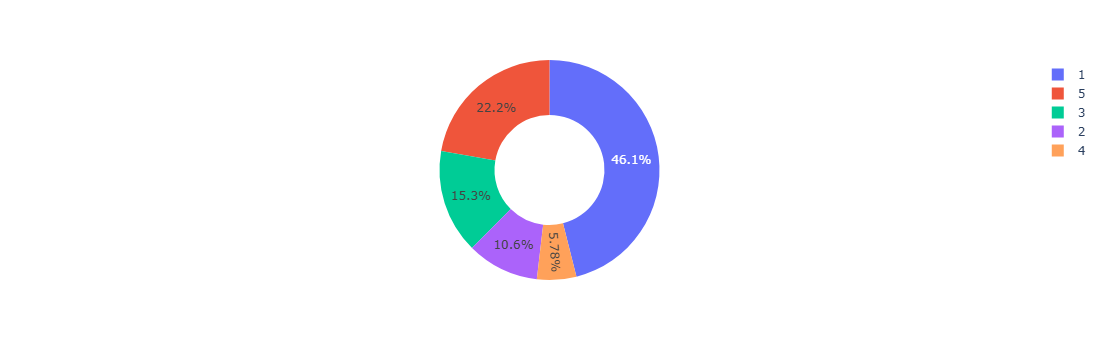

In [51]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

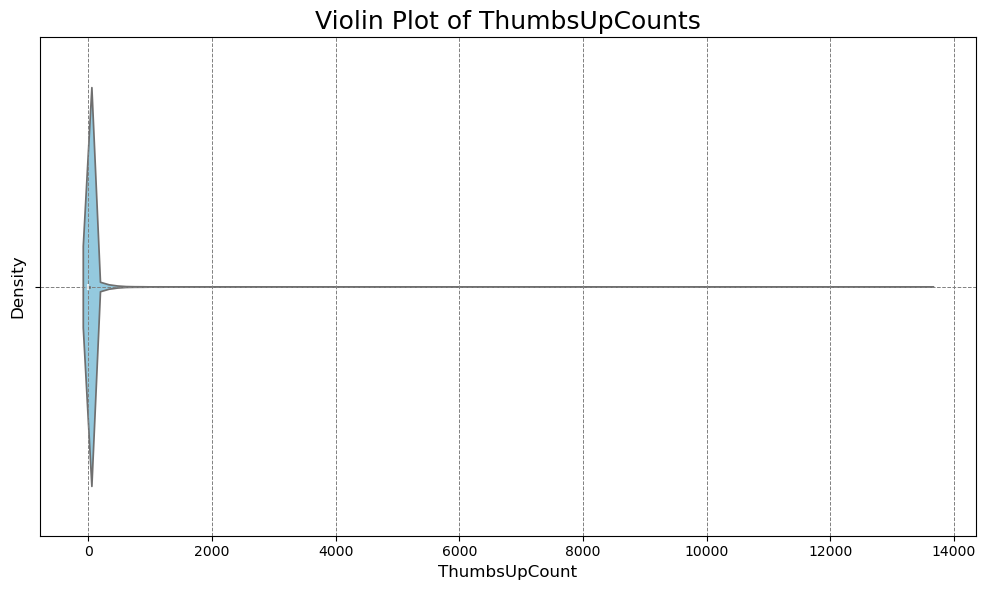

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='thumbsUpCount', color='skyblue')

plt.title('Violin Plot of ThumbsUpCounts', fontsize=18)
plt.xlabel('ThumbsUpCount', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, color='gray')

plt.tight_layout()
plt.show()

C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\531135650.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




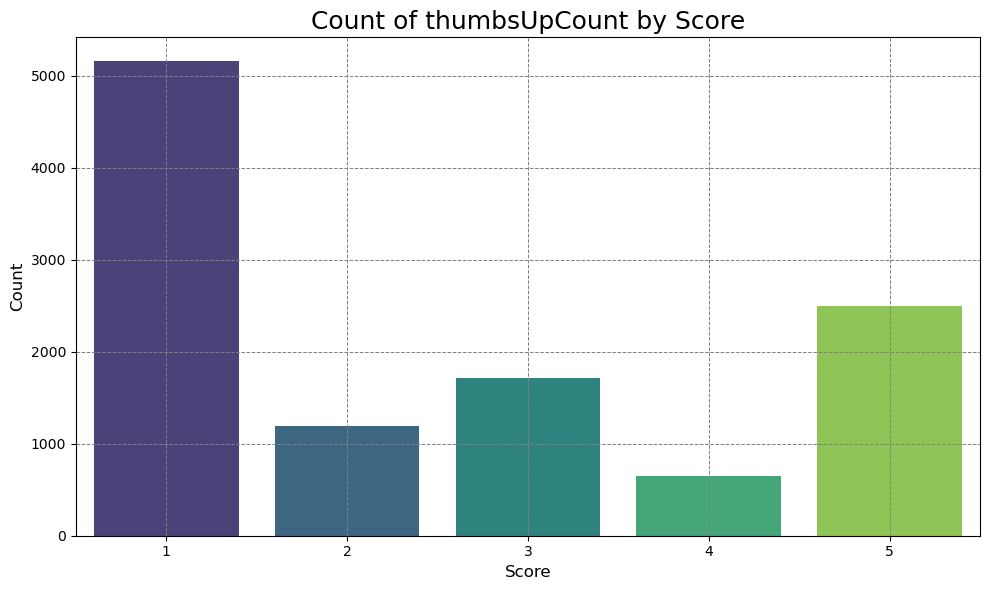

In [57]:
count_data = data.groupby('score')['thumbsUpCount'].count().reset_index(name='count')

plt.figure(figsize=(10, 6))

sns.barplot(data=count_data, x='score', y='count', palette='viridis')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, color='gray')
plt.xlabel('Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of thumbsUpCount by Score', fontsize=18)

plt.tight_layout()
plt.show()

C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\389772248.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




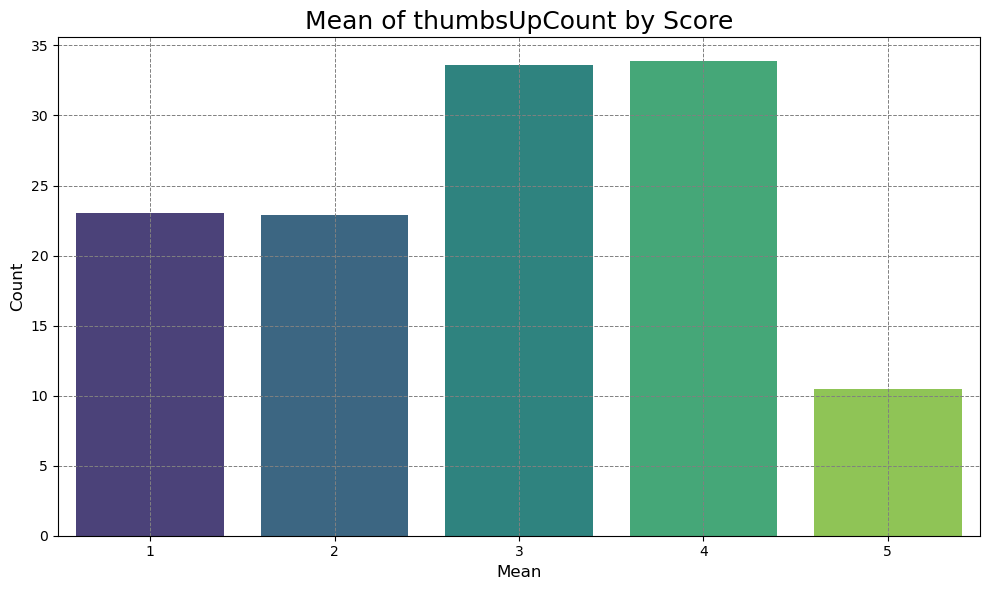

In [59]:
mean_data = data.groupby('score')['thumbsUpCount'].mean().reset_index(name='mean')

plt.figure(figsize=(10, 6))

sns.barplot(data=mean_data, x='score', y='mean', palette='viridis')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, color='gray')
plt.xlabel('Mean', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Mean of thumbsUpCount by Score', fontsize=18)

plt.tight_layout()
plt.show()

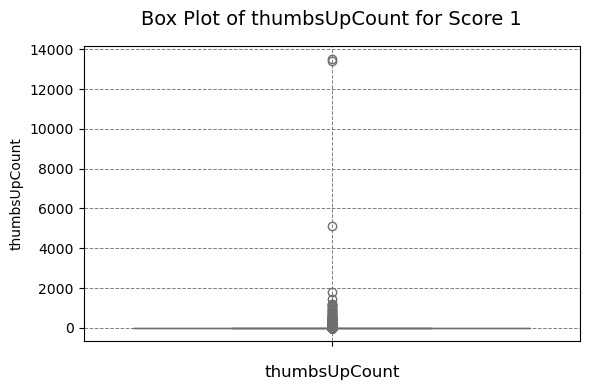

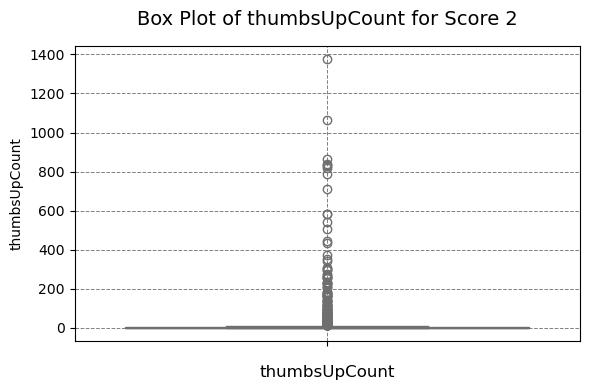

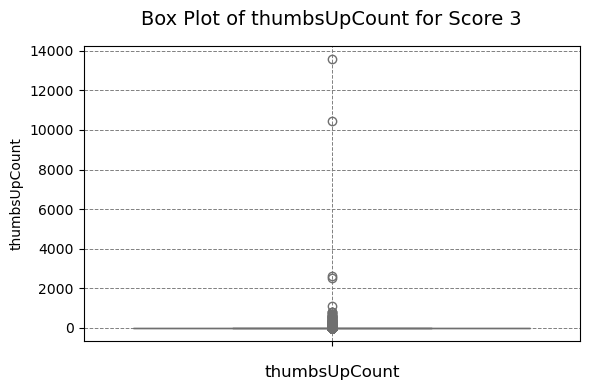

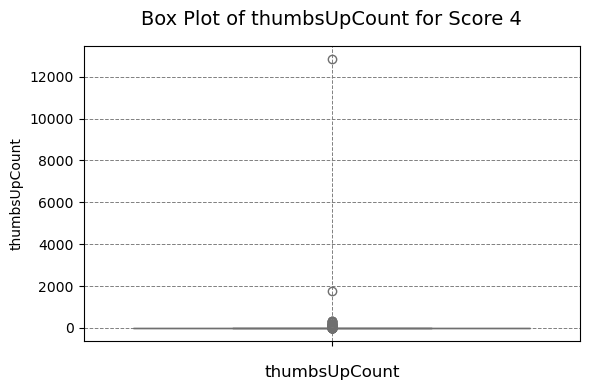

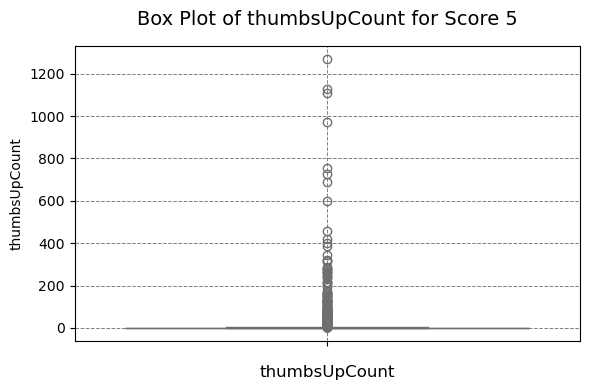

In [63]:
score_groups = data.groupby('score')['thumbsUpCount']

for score, group in score_groups:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=group, color='skyblue')
    plt.title(f"Box Plot of thumbsUpCount for Score {score}", fontsize=14, pad=15)
    plt.xlabel('thumbsUpCount', fontsize=12, labelpad=10)
    plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, color='gray')
    plt.tight_layout()
    plt.show()

In [ ]:
#Evaluation Dashboard

In [67]:
def classify_review(score):
    if score in [1,2]:
        return 'bad'
    elif score == 3:
        return 'normal'
    elif score in [4,5]:
        return 'good'

data['review'] = data['score'].apply(classify_review)
data['review'].unique()

C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\4150373883.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['bad', 'normal', 'good'], dtype=object)

C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\3240735932.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\3240735932.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




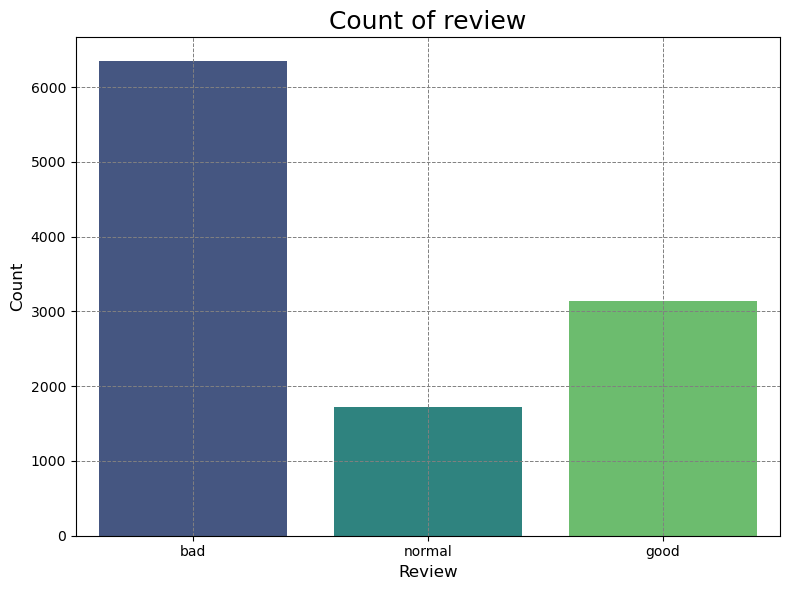

In [69]:
review_order = ['bad', 'normal', 'good']
data['review'] = pd.Categorical(data['review'], categories=review_order, ordered=True)

review_counts = data['review'].value_counts().reindex(review_order)

plt.figure(figsize=(8, 6))
sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, color='gray')
plt.xlabel('Review', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of review', fontsize=18)

plt.tight_layout()
plt.show()

C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\1273488130.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\aadit\AppData\Local\Temp\ipykernel_51916\1273488130.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




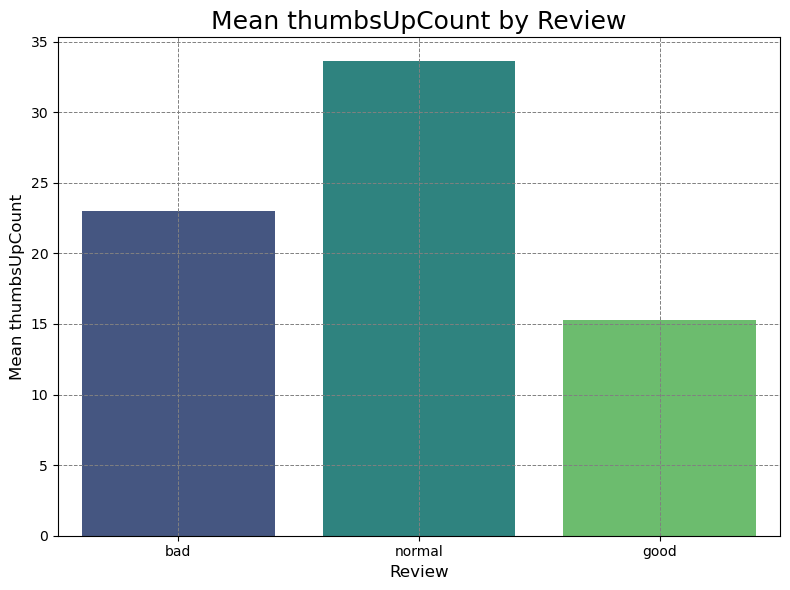

In [75]:
mean_data = data.groupby('review')['thumbsUpCount'].mean().reset_index(name='mean')


plt.figure(figsize=(8, 6))
sns.barplot(x=mean_data['review'], y=mean_data['mean'], palette='viridis')

plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, color='gray')
plt.xlabel('Review', fontsize=12)
plt.ylabel('Mean thumbsUpCount', fontsize=12)
plt.title('Mean thumbsUpCount by Review', fontsize=18)

plt.tight_layout()
plt.show()